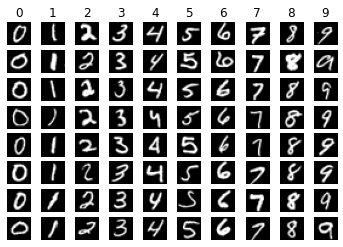

Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.54      0.94      0.69       164
           1       0.71      0.94      0.81       152
           2       0.83      0.50      0.62       155
           3       0.83      0.53      0.65       154
           4       0.75      0.31      0.44       143
           5       0.67      0.16      0.25       141
           6       0.81      0.85      0.83       143
           7       0.83      0.82      0.83       158
           8       0.41      0.64      0.50       132
           9       0.60      0.84      0.70       158

    accuracy                           0.66      1500
   macro avg       0.70      0.65      0.63      1500
weighted avg       0.70      0.66      0.64      1500


Confusion matrix SKLearn GNB:
[[154   0   6   0   1   1   0   0   1   1]
 [  1 143   1   0   0   1   0   1   3   2]
 [ 11   6  77  10   2   1  19   1  27   1]
 [ 32  11   5  82   0   0   2   3  12   7]
 [ 

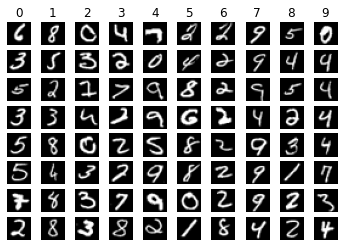

In [129]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from Handout_MNIST import MNIST


# load the MNIST_Light data
mnist = MNIST.MNISTData('Handout_MNIST/MNIST_Light/*/*.png')

# get_data() produces the subsets with already normalised (between 0.0 and 1.0) data
train_features, test_features, train_labels, test_labels = mnist.get_data()

# just show some of the images
mnist.visualize_random()

gnb = GaussianNB()
gnb.fit(train_features, train_labels)
y_pred = gnb.predict(test_features)

print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print("Confusion matrix SKLearn GNB:\n%s" % metrics.confusion_matrix(test_labels, y_pred))

# show the first 8 (or less) wrongly classified images for each class
mnist.visualize_wrong_class(y_pred, 8)



In [7]:
#Downloading digit dataset from load_digits
from sklearn.datasets import load_digits
import numpy as np
from sklearn import metrics

features, labels = load_digits(return_X_y=True)

test_features = features[-round(len(features)/5):]
train_features = features[:-round(len(features)/5)]
test_labels = labels[-round(len(labels)/5):]
train_labels = labels[:-round(len(labels)/5)]


print(f"Train data: {train_features.shape}")
print(f"Test data: {test_features.shape}")

Train data: (1438, 64)
Test data: (359, 64)


In [3]:
def get_probability_of_pixel_in_digit(threshold=10):
    # get the probability of each pixel being in a digit
    # (for each digit)
    digit_pixel_probabilities = []
    for digit in range(10):
        # get the indices of the pixels that belong to the digit
        digit_indices = np.where(train_labels == digit)
        # get the number of pixels in the digit
        n_pixels = len(digit_indices[0])
        
        refined_fetures = np.ones(len(train_features[0]))
        for feature_set in train_features[digit_indices]:
            for pixel_index,pixel in enumerate(feature_set):
                if pixel > threshold:
                    refined_fetures[pixel_index] += 1

        digit_pixel_probabilities.append(refined_fetures/len(digit_indices[0]))
    return np.array(digit_pixel_probabilities)


#print(get_probability_of_pixel_in_digit())




In [4]:


def get_probability_of_number():
    return np.array([len(i)/len(train_labels) for i in [np.where(train_labels == i)[0] for i in range(10)]])

print(f"Probabilities of numbers: {get_probability_of_number()}")
print(f"Probabilities of pixel in number 0: \n{get_probability_of_pixel_in_digit()[0]}")
      

Probabilities of numbers: [0.09944367 0.1015299  0.09944367 0.1015299  0.10013908 0.10083449
 0.10013908 0.09944367 0.09805285 0.09944367]
Probabilities of pixel in number 0: 
[0.00699301 0.00699301 0.02097902 0.86713287 0.71328671 0.05594406
 0.00699301 0.00699301 0.00699301 0.02097902 0.76923077 0.7972028
 0.58041958 0.68531469 0.00699301 0.00699301 0.00699301 0.02097902
 0.92307692 0.18181818 0.04895105 0.70629371 0.00699301 0.00699301
 0.00699301 0.02097902 0.76923077 0.03496503 0.00699301 0.37762238
 0.02097902 0.00699301 0.00699301 0.00699301 0.60839161 0.01398601
 0.00699301 0.39160839 0.07692308 0.00699301 0.00699301 0.00699301
 0.86013986 0.03496503 0.02097902 0.67132867 0.13286713 0.00699301
 0.00699301 0.00699301 0.83916084 0.44755245 0.5034965  0.81118881
 0.05594406 0.00699301 0.00699301 0.00699301 0.02097902 0.90909091
 0.9020979  0.12587413 0.00699301 0.00699301]


In [5]:
def predict(feat,threshold=10): 

    probability_of_number = get_probability_of_number()
    probability_of_pixel_in_digit = get_probability_of_pixel_in_digit()

    probabilities = []
    for i in range(10):
        log_sum = 0
        for index,j in enumerate(feat):
            if(j > threshold):
                log_sum += np.log(j*probability_of_pixel_in_digit[i][index])
        probabilities.append(log_sum+np.log(probability_of_number[i]))
        
    return np.argmax(probabilities)

predict(test_features[1])

4

In [8]:
# Printing metics
y_pred = []
for sample in test_features:
    y_pred.append(predict(sample))
        
print("Classification report SKLearn GNB:\n%s\n"
  % (metrics.classification_report(test_labels, y_pred)))
print(f"Confusion matrix:\n {metrics.confusion_matrix(test_labels, y_pred)}")


Classification report SKLearn GNB:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90        35
           1       0.71      0.67      0.69        36
           2       0.94      0.91      0.93        34
           3       0.91      0.54      0.68        37
           4       0.82      0.89      0.86        37
           5       0.90      0.70      0.79        37
           6       0.94      0.89      0.92        37
           7       0.81      0.72      0.76        36
           8       0.44      0.79      0.57        33
           9       0.63      0.73      0.68        37

    accuracy                           0.77       359
   macro avg       0.80      0.77      0.78       359
weighted avg       0.81      0.77      0.78       359


Confusion matrix:
 [[30  0  0  0  3  0  0  0  2  0]
 [ 0 24  0  0  0  0  0  0  5  7]
 [ 1  2 31  0  0  0  0  0  0  0]
 [ 0  1  1 20  0  0  2  1 12  0]
 [ 0  0  1  0 33  0  0  1  2  0]
 [ 0  2  0  0  1 26  